# The Essence of Monte Carlo Simulations

When we run a Monte Carlo simulation, we are interested in observing the different possible realizations of a future event. We can use past data to create a simulation - a new set of fictional but sensible data. 

# Predicting Gross Profit

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rev_m = 170
rev_stdev = 20
iterations = 1000

In [3]:
rev = np.random.normal(rev_m, rev_stdev, iterations)
rev

array([178.65405091, 174.56010218, 184.48127786, 192.72718668,
       150.8556721 , 151.90415505, 167.40023173, 170.888935  ,
       177.13457084, 128.06401521, 160.92608528, 174.49863593,
       133.7984532 , 172.6184457 , 144.3388248 , 159.07901416,
       174.664765  , 140.4853566 , 185.92022064, 169.96711429,
       143.77565547, 184.18168638, 141.39466822, 154.08162675,
       182.55221676, 162.56777323, 202.3812779 , 180.07487367,
       143.8708799 , 190.24888192, 186.42943135, 175.06368903,
       167.21527402, 195.34055953, 174.97574104, 194.86673917,
       154.05116319, 188.9457835 , 186.32224849, 149.44709371,
       153.2203016 , 162.71847022, 174.68896642, 168.3855878 ,
       200.39818909, 193.03402889, 169.52374631, 140.36850246,
       139.09527667, 168.31929834, 146.38814266, 205.86306167,
       175.24063212, 193.23382762, 184.1380816 , 167.83658321,
       173.12122948, 173.56412866, 179.56038233, 172.85596407,
       203.87687675, 157.69208592, 167.69493917, 169.89

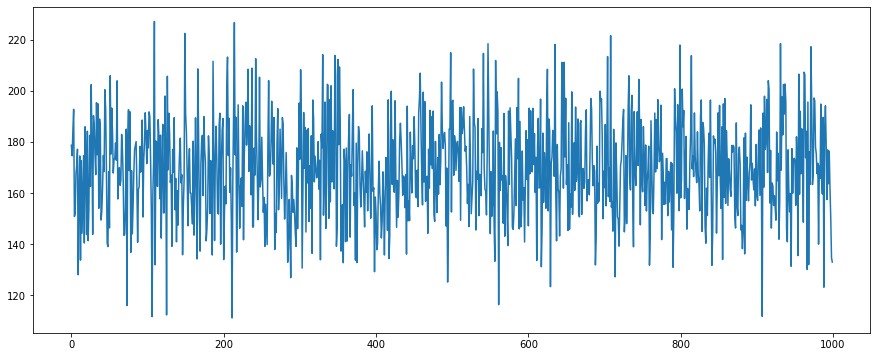

In [4]:
plt.figure(figsize=(15,6))
plt.plot(rev)

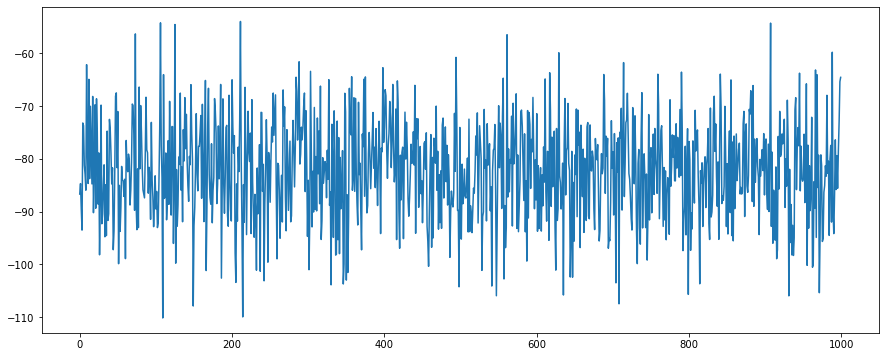

In [5]:
COGS = - (rev * np.random.normal(0.6, 0.1))

plt.figure(figsize=(15,6))
plt.plot(COGS)

In [6]:
COGS.mean()

-82.24799404547431

In [7]:
COGS.std()

9.441970971894287

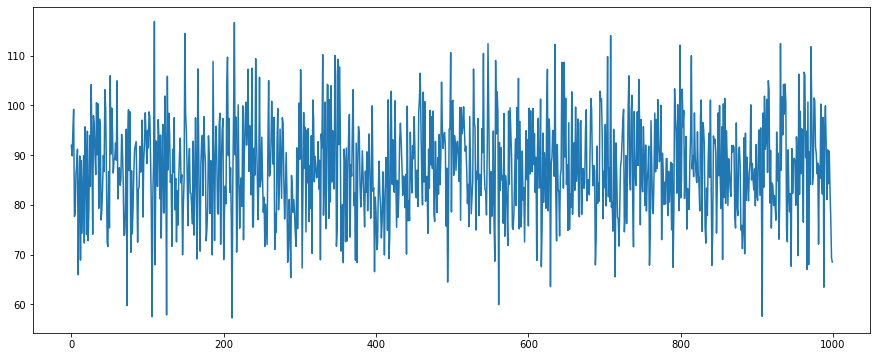

In [9]:
Gross_Profit = rev + COGS
Gross_Profit

plt.figure(figsize=(15,6))
plt.plot(Gross_Profit)

In [10]:
max(Gross_Profit)

116.89121517018434

In [11]:
min(Gross_Profit)

57.23481737715501

In [12]:
Gross_Profit.mean()

87.25792288290022

In [13]:
Gross_Profit.std()

10.017104787657352

(array([  0.,   6.,  35., 203., 372., 283.,  87.,  14.]),
 array([ 40,  50,  60,  70,  80,  90, 100, 110, 120]),
 <BarContainer object of 8 artists>)

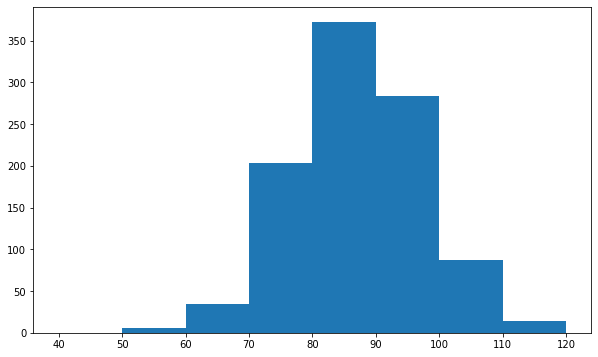

In [14]:
plt.figure(figsize=(10,6))
plt.hist(Gross_Profit, bins = [40, 50, 60, 70, 80, 90, 100, 110, 120])

(array([  6.,   0.,   6.,  23.,  28.,  53.,  66.,  93., 103., 132., 107.,
         98.,  91.,  70.,  62.,  20.,  20.,  13.,   5.,   4.]),
 array([ 57.23481738,  60.21763727,  63.20045716,  66.18327705,
         69.16609694,  72.14891683,  75.13173672,  78.1145566 ,
         81.09737649,  84.08019638,  87.06301627,  90.04583616,
         93.02865605,  96.01147594,  98.99429583, 101.97711572,
        104.95993561, 107.9427555 , 110.92557539, 113.90839528,
        116.89121517]),
 <BarContainer object of 20 artists>)

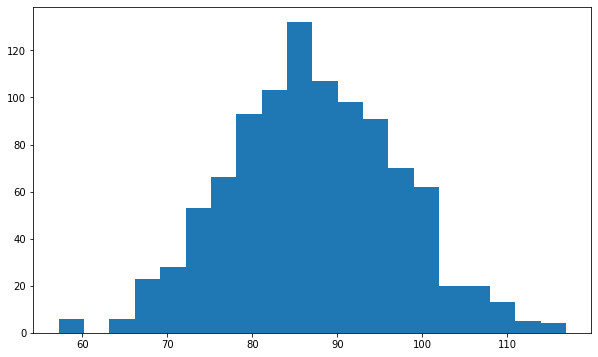

In [15]:
plt.figure(figsize=(10,6))
plt.hist(Gross_Profit, bins = 20)

# Forecasting Stock Prices with a Monte Carlo Simulation

$Price Today = PriceYesterday * e^r$

r is the log return of share price between yesterday and today = ln(price today / price yesterday)

We can use Brownian motion in order to model r. 

Brownian motion is made up of two elements:
- Drift
- Volatility

Drift is the direction rates of return have been headed in the past: ln(current price / previous price). Calculate the average, standard deviation, and variance of daily returns in the historical period. 

$Drift = \mu - \frac{1}{2}\sigma^2$

Volatility is a random variable = sigma * Z(Rand(0;1))

<center>$PriceToday = PriceYesterday * e^{\mu - \frac{1}{2}\sigma^2 + \sigma Z[Rand(0;1)]}$</center>

If we simulate this 1000 times, we will be able to have a guess at tomorrow's stock price and assess the liklihood it is going to follow a certain pattern. 

In [16]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm

In [18]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2007-1-1')['Adj Close']

In [19]:
log_returns = np.log(1 + data.pct_change())

In [20]:
log_returns.tail()

,PG
Date,
2021-09-28,-0.007582
2021-09-29,0.010120
2021-09-30,-0.015755
2021-10-01,-0.001575
2021-10-04,-0.005676


<AxesSubplot:xlabel='Date'>

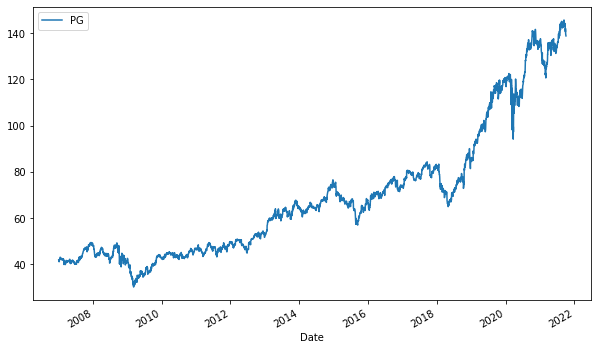

In [21]:
data.plot(figsize=(10,6))

<AxesSubplot:xlabel='Date'>

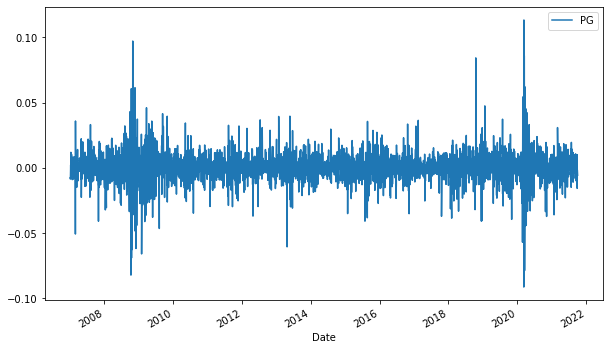

In [22]:
log_returns.plot(figsize=(10,6))

In [23]:
u = log_returns.mean()
u

PG    0.000323
dtype: float64

In [25]:
var = log_returns.var()
var

PG    0.000138
dtype: float64

In [26]:
drift = u - 0.5 * var
drift

PG    0.000254
dtype: float64

In [28]:
stdev = log_returns.std()
stdev

PG    0.011751
dtype: float64

In [29]:
type(drift)

pandas.core.series.Series

In [30]:
type(stdev)

pandas.core.series.Series

In [31]:
x = np.random.rand(10,2)
x

array([[0.3333176 , 0.69703858],
       [0.46018563, 0.78253321],
       [0.30114849, 0.16089716],
       [0.02758061, 0.5921472 ],
       [0.96845594, 0.28388418],
       [0.64666261, 0.46314408],
       [0.75773358, 0.87546574],
       [0.60544289, 0.00168816],
       [0.96974816, 0.85449292],
       [0.6843431 , 0.03304094]])

In [32]:
norm.ppf(x)

array([[-0.43077057,  0.51590203],
       [-0.09996607,  0.78077715],
       [-0.52110019, -0.99077733],
       [-1.91760425,  0.23307186],
       [ 1.85857002, -0.57134124],
       [ 0.37632571, -0.09251591],
       [ 0.69903071,  1.15261482],
       [ 0.26746103, -2.93122114],
       [ 1.8771052 ,  1.05589944],
       [ 0.47987849, -1.83786779]])

In [33]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.02067878, -0.11924692],
       [ 0.53386608, -0.10579965],
       [-0.28390604, -1.66048543],
       [ 1.30347467,  0.81263089],
       [-0.13063567,  0.8582967 ],
       [ 1.35803413, -0.10409998],
       [-0.49939285, -0.82724727],
       [-0.14823202, -1.63283977],
       [ 0.2720198 ,  0.27620709],
       [-0.6885447 ,  0.3491106 ]])

In [34]:
t_intervals = 1000
iterations = 10

In [35]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [36]:
daily_returns

array([[1.00235671, 0.97970088, 1.00643218, ..., 0.99522823, 1.0066506 ,
        1.0058152 ],
       [1.01823181, 1.00673124, 1.00605896, ..., 0.98144922, 0.96327926,
        1.01432658],
       [0.99887038, 1.0044198 , 1.0016481 , ..., 1.00782596, 1.01046779,
        0.99469725],
       ...,
       [1.01384823, 1.00497325, 1.01380908, ..., 1.01507008, 0.99970597,
        1.02201728],
       [0.9968514 , 1.01172495, 1.01549832, ..., 0.99782301, 1.01069816,
        0.99506359],
       [1.01329365, 1.00489103, 0.99140816, ..., 1.00329339, 1.01153632,
        0.99820493]])

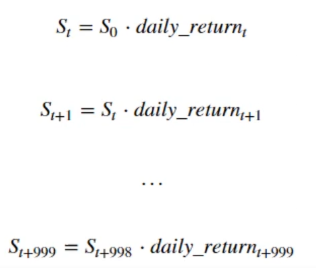

In [38]:
from IPython.display import Image
Image(filename='dailyreturn.png')

In [39]:
S0 = data.iloc[-1]
S0

PG    138.789993
Name: 2021-10-04 00:00:00, dtype: float64

In [40]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
price_list[0] = S0
price_list

array([[138.78999329, 138.78999329, 138.78999329, ..., 138.78999329,
        138.78999329, 138.78999329],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [44]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [45]:
price_list

array([[138.78999329, 138.78999329, 138.78999329, ..., 138.78999329,
        138.78999329, 138.78999329],
       [141.32038664, 139.72422233, 139.63091648, ..., 136.21533095,
        133.69352179, 140.77837953],
       [141.16074884, 140.34177613, 139.86104284, ..., 137.28134712,
        135.0929976 , 140.03186711],
       ...,
       [154.52012869, 318.49203241, 160.03115585, ..., 221.95705971,
        166.56637766, 140.40597331],
       [154.03360672, 322.22633679, 162.51136969, ..., 221.47386232,
        168.34833122, 139.71287126],
       [156.08127574, 323.80235645, 161.11509859, ..., 222.20326209,
        170.29045095, 139.46207677]])

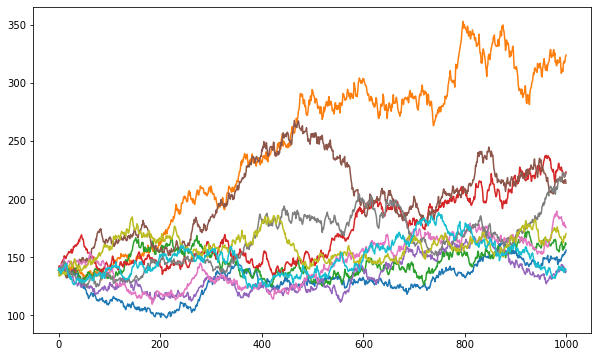

In [46]:
plt.figure(figsize=(10,6))
plt.plot(price_list)

# Introduction to Derivative Contracts

A derivative is a financial instrument, whose price is derived based on the development of one or more underlying assets. 

There are three groups of people when it comes to dealing with derivatives. 
- Hedging
- Speculating
- Aribtrageurs

There are four main types of financial derivatives
- Forwards: Two parties agree that one party will sell to the other an underlying asset at a future point in time. The price of the asset is agreed beforehand. 
- Futures: Highly standardized forward contracts. The difference is the level of standardization and the participation of a clearing house. The transaction goes through the market place and the two parties do not know each other. 
- Swaps: Two parties agree to exchange cash flows based on an underlying asset at a future point in time. Swap contracts can be based on plenty of underlying assets. 
- Options: Enables its owner to buy or sell an underlying asset at a given price. 
    - Option contracts can be exercised until a certain date
    - Call Options (Option to buy an assset) vs. Put Options (Option to sell an asset)

# The Black Sholes Formula for Option Pricing

The Black Sholes formula calculates the value of an option. 

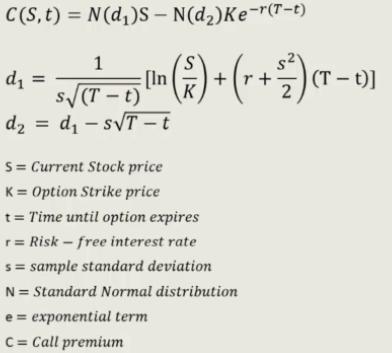

In [48]:
Image(filename='Black Sholes Formula.png')

d1 is how much we can expect if the option is exercised. d2 is the amount we must pay when exercising the option. The Black Sholes foumla calculates the value of a call by taking the difference between the amount you get if you exercise the option minus the amount you have to pay if you exercise the option. 